Hi , I am Yesmine Bellalah, and this is the solution I propose for the test. 

## Packages needed 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
from imblearn.over_sampling import SMOTE

## Importing train and test data 

In [2]:
#Train
path=r'C:/Users/yesmi/Desktop/DataScience/us_census_full/census_income_learn.csv'
train= pd.read_csv(path,header=None,sep=',')
##Test 
path=r'C:/Users/yesmi/Desktop/DataScience/us_census_full/census_income_test.csv'
test= pd.read_csv(path,header=None,sep=',')

In [3]:
train.shape

(199523, 42)

In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [5]:
test.shape

(99762, 42)

In [6]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [3]:
test.index = range(train.shape[0],train.shape[0]+test.shape[0])

In [8]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
199523,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
199524,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
199525,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
199526,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
199527,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [4]:
data=pd.concat([train,test])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [5]:
data.shape

(299285, 42)

In [11]:
data.info

<bound method DataFrame.info of         0                                1   2   3   \
0       73                  Not in universe   0   0   
1       58   Self-employed-not incorporated   4  34   
2       18                  Not in universe   0   0   
3        9                  Not in universe   0   0   
4       10                  Not in universe   0   0   
5       48                          Private  40  10   
6       42                          Private  34   3   
7       28                          Private   4  40   
8       47                 Local government  43  26   
9       34                          Private   4  37   
10       8                  Not in universe   0   0   
11      32                  Not in universe   0   0   
12      51                          Private   4  34   
13      46                          Private  37  31   
14      26                          Private  24  12   
15      13                  Not in universe   0   0   
16      47                       

In [12]:
data.describe()

,0,2,3,5,16,17,18,24,30,36,38,39,40
count,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000
mean,34.538998,15.345818,11.314743,55.105027,431.742176,36.849010,195.851259,1740.101125,1.956172,0.176461,1.516498,23.178375,94.499998
std,22.318468,18.053638,14.455980,273.340729,4670.768536,269.789771,1937.847082,994.144299,2.364857,0.555240,0.850395,24.404016,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1060.490000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1617.110000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2188.110000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [13]:
data.dtypes

0       int64
1      object
2       int64
3       int64
4      object
5       int64
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16      int64
17      int64
18      int64
19     object
20     object
21     object
22     object
23     object
24    float64
25     object
26     object
27     object
28     object
29     object
30      int64
31     object
32     object
33     object
34     object
35     object
36      int64
37     object
38      int64
39      int64
40      int64
41     object
dtype: object

## Checking for missing values 

We have zero missing values 

In [14]:
np.count_nonzero(pd.isnull(data)) 

0

## Splitting data into categorical and continuous variables 

In [15]:
inttype = [x for x in data.columns 
      if  (data[x].dtype == np.int64 )]
      
for x in inttype:
    print (data[x].value_counts())
#variables 30,36,38 and 40 will be considered as categorical variables because they have no more than 5 modalities 

34    5210
35    5120
33    5090
4     5001
5     4974
31    4956
3     4946
36    4925
37    4924
38    4915
7     4826
30    4818
32    4816
2     4790
8     4748
39    4747
40    4703
6     4699
13    4690
11    4685
9     4675
41    4654
10    4650
12    4641
1     4641
14    4630
42    4525
28    4512
29    4504
15    4385
      ... 
64    2329
62    2323
60    2321
63    2253
61    2246
67    2210
66    2199
68    2168
71    2128
70    2119
69    2097
72    2013
73    2006
74    1842
75    1623
76    1612
77    1458
78    1316
79    1233
80    1198
90    1098
81    1056
82     939
83     837
84     786
85     639
86     510
87     456
88     382
89     304
Name: 0, Length: 91, dtype: int64
0     150967
33     25782
43     12510
4       9051
42      6987
45      6686
29      6420
37      6161
41      5815
32      5418
35      5045
39      4393
34      4119
44      3771
2       3273
11      2667
50      2525
38      2475
40      2472
47      2448
24      2234
19      2067
12      2

In [6]:
##splitting data into categorical and non categorical data 
 
quali = [x for x in data.columns \
                if not (data[x].dtype == np.float64  \
                        or data[x].dtype == np.int64)]
quali=quali+[30,36,38,40]
quali=sorted(quali)
quanti= [x for x in data.columns \
                if (data[x].dtype == np.float64 \
                        or data[x].dtype == np.int64)]
quanti=[x for x in quanti if x not in [30,36,38,40]]


In [7]:
len(quanti)

9

In [8]:
len(quali)

33

In [19]:
quanti

[0, 2, 3, 5, 16, 17, 18, 24, 39]

In [20]:
quali

[1,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41]

In [21]:
## checking modaities of each categorical variable 
for x in quali:
    print (data[x].value_counts())

 Not in universe                   150324
 Private                           108099
 Self-employed-not incorporated     12725
 Local government                   11617
 State government                    6394
 Self-employed-incorporated          4913
 Federal government                  4330
 Never worked                         643
 Without pay                          240
Name: 1, dtype: int64
 High school graduate                      72554
 Children                                  70864
 Some college but no degree                41774
 Bachelors degree(BA AB BS)                29750
 7th and 8th grade                         12156
 10th grade                                11370
 11th grade                                10399
 Masters degree(MA MS MEng MEd MSW MBA)     9847
 9th grade                                  9335
 Associates degree-occup /vocational        8048
 Associates degree-academic program         6442
 5th or 6th grade                           4991
 12th grade 

 Householder                             113418
 Child under 18 never married             75465
 Spouse of householder                    62366
 Child 18 or older                        21769
 Other relative of householder            14533
 Nonrelative of householder               11478
 Group Quarters- Secondary individual       187
 Child under 18 ever married                 69
Name: 23, dtype: int64
 ?                   149642
 Nonmover            123937
 MSA to MSA           15890
 NonMSA to nonMSA      4155
 Not in universe       2239
 MSA to nonMSA         1154
 NonMSA to MSA          910
 Not identifiable       630
 Abroad to MSA          619
 Abroad to nonMSA       109
Name: 25, dtype: int64
 ?                                 149642
 Nonmover                          123937
 Same county                        14691
 Different county same state         4126
 Not in universe                     2239
 Different region                    1761
 Different state same division       1

## Output Variable 

In [22]:
data[41].value_counts()


 - 50000.    280717
 50000+.      18568
Name: 41, dtype: int64

In [23]:
train[41].value_counts()

 - 50000.    187141
 50000+.      12382
Name: 41, dtype: int64

In [24]:
100*12382/(187141+12382)

6.205800834991455

In [25]:
test[41].value_counts()

 - 50000.    93576
 50000+.      6186
Name: 41, dtype: int64

In [26]:
100*18568/(280717+18568)


6.204119818901716

==> We have very imbalanced data

Transforming the output variable into a binary variable (0,1)

In [9]:
def transform(x):
    if x==" 50000+.":
        return 1
    else:
        return 0
    
data[41]=list(map(transform,data[41]))

In [10]:
data[41].value_counts()

0    280717
1     18568
Name: 41, dtype: int64

In [29]:
data[41].value_counts()

0    280717
1     18568
Name: 41, dtype: int64

### Visualizing the output variable

Only 6.2% of the population has income > 5000 


([<matplotlib.patches.Wedge at 0x2a31798bf28>,
  <matplotlib.text.Text at 0x2a3179adba8>])

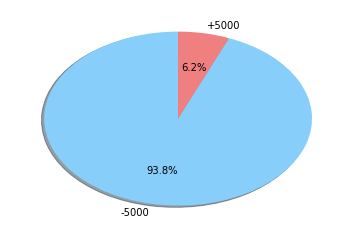

In [30]:
plt.pie(data[41].value_counts(),  labels= ('-5000','+5000'), colors=[ 'lightskyblue', 'lightcoral'],
        autopct='%1.1f%%', shadow=True, startangle=90)

In [11]:
data_quanti=data.iloc[:,quanti]
data_quali=data.iloc[:,quali]

In [12]:
data_quanti.shape

(299285, 9)

In [13]:
data_quali.shape

(299285, 33)

Data Visualization and outliers detection 

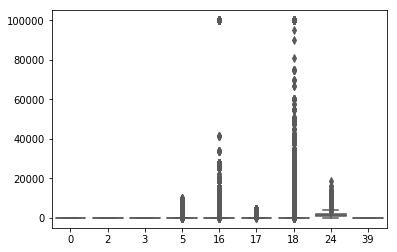

In [34]:
## Detecting outliers

ax = sns.boxplot(data=data_quanti, orient="v", palette="Set2")



C:\Users\yesmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


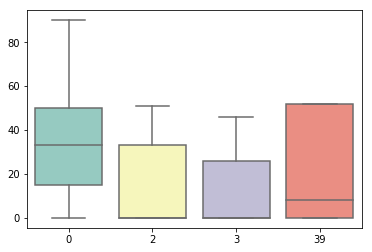

In [35]:
ax = sns.boxplot(data=data_quanti.ix[:,[0,2,3,39]], orient="v", palette="Set3")

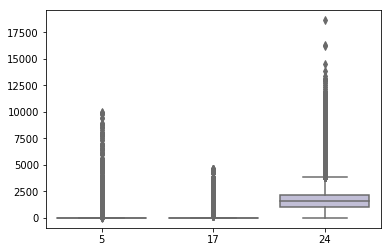

In [36]:
ax = sns.boxplot(data=data_quanti.ix[:,[5,17,24]], orient="v", palette="Set3")
## 24 th variable has outliers 

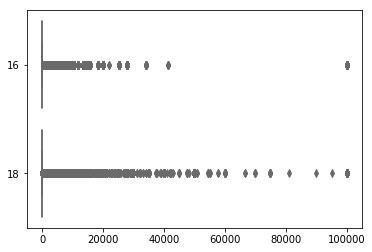

In [37]:
ax = sns.boxplot(data=data_quanti.ix[:,[16,18]], orient="h", palette="Set3")
## 16 th variable has definitely outliers 

C:\Users\yesmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


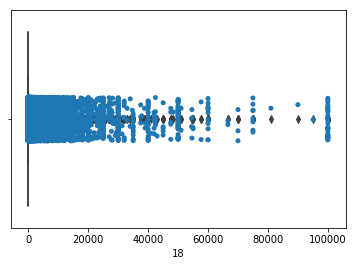

In [38]:
a=sns.boxplot(x=data.ix[:,18],data=data)
a=sns.stripplot(x=data.ix[:,18],data=data,jitter=True,edgecolor='gray')

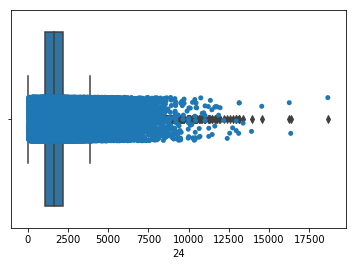

In [39]:
a=sns.boxplot(x=data.ix[:,24],data=data)
a=sns.stripplot(x=data.ix[:,24],data=data,jitter=True,edgecolor='gray')

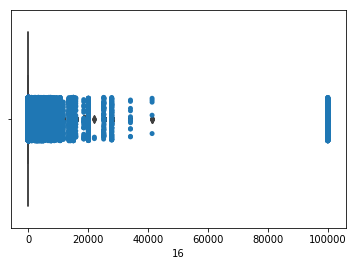

In [40]:
a=sns.boxplot(x=data.ix[:,16],data=data)
a=sns.stripplot(x=data.ix[:,16],data=data,jitter=True,edgecolor='gray')

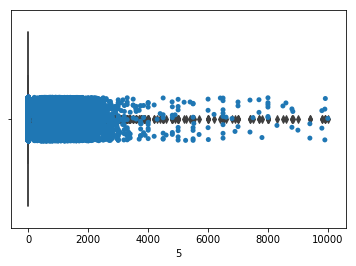

In [41]:
a=sns.boxplot(x=data.ix[:,5],data=data)
a=sns.stripplot(x=data.ix[:,5],data=data,jitter=True,edgecolor='gray')

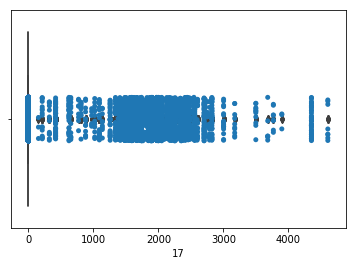

In [42]:
a=sns.boxplot(x=data.ix[:,17],data=data)
a=sns.stripplot(x=data.ix[:,17],data=data,jitter=True,edgecolor='gray')

41
0    [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
1    [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
dtype: object

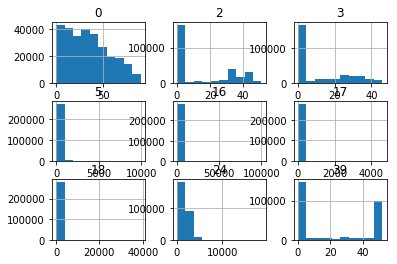

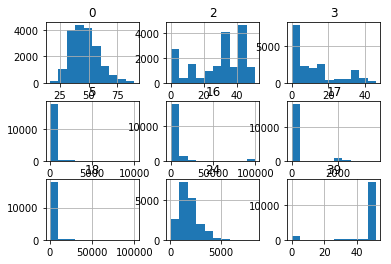

In [43]:
data_quanti.groupby(data[41]).hist()

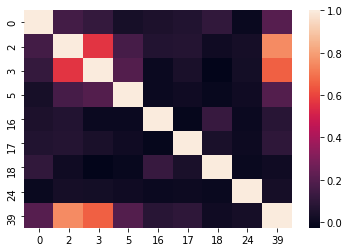

In [44]:
## Correlation matrix
corr = data_quanti.corr()

# plot the heatmap
sns.heatmap(corr)

==> We have no correlation between variables , only two are correlated (2 and 39)

## Data Preprocessing

In [14]:
del data_quali[41]
quali.remove(41)


In [15]:
print(data_quali.shape,quali)

(299285, 32) [1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40]


In [16]:
## one hot encoding:

for i in list(quali):
        data_quali[i] = data_quali[i].astype('category')
data_quali=pd.get_dummies(data_quali, sparse=True)

C:\Users\yesmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
data_quali.shape

(299285, 411)

In [18]:
data_quali.head()

,1_ Federal government,1_ Local government,1_ Never worked,1_ Not in universe,1_ Private,1_ Self-employed-incorporated,1_ Self-employed-not incorporated,1_ State government,1_ Without pay,4_ 10th grade,...,36_1,36_2,37_ No,37_ Not in universe,37_ Yes,38_0,38_1,38_2,40_94,40_95
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [19]:
newdata=pd.concat([data[41] ,data_quanti,data_quali],axis=1)
newdata.shape

(299285, 421)

In [20]:
train=newdata[:len(train)]
test=newdata[len(train):len(test)+len(train)]
test=test.reset_index(drop=True)

In [21]:
print(train.shape, test.shape)

(199523, 421) (99762, 421)


In [22]:
X_train = train.iloc[:,1:] 
y_train=train[41]

X_test = test.iloc[:,1:] 
y_test=test[41]

## Defining performance function


Since my data is very imbalanced, I will concentrate on assessing the performance of a model by precision, recall and F1-score.

In [23]:
## performance function

def performance(model,X,y,pred):
    #accuracy 
    acc=model.score(X,y)
    #roc auc
    roc_auc=roc_auc_score(y,pred)
#precision
    precision=precision_score(y ,pred)
#precision-recall auc
    pr_auc=average_precision_score(y ,pred)
#Recall
    recall=recall_score(y,pred)
#F1 score
    F1_score=f1_score(y,pred)
    m=[acc,roc_auc,pr_auc,precision,recall,F1_score]
    n=['Accuracy','ROC-auc','PR-auc','Precision','Recall','F1-score']
    performance=pd.DataFrame([n,m])
    return(performance)
    
def performancemodified(y,pred):
    #accuracy 
    acc=accuracy_score(pred,y)
    #roc auc
    roc_auc=roc_auc_score(y,pred)
#precision
    precision=precision_score(y ,pred)
#precision-recall auc
    pr_auc=average_precision_score(y ,pred)
#Recall
    recall=recall_score(y,pred)
#F1 score
    F1_score=f1_score(y,pred)
    m=[acc,roc_auc,pr_auc,precision,recall,F1_score]
    n=['Accuracy','ROC-auc','PR-auc','Precision','Recall','F1-score']
    performance=pd.DataFrame([n,m])
    return(performance)
  

## First model: Logistic regression

I am going to start with a very basic classification model: Logistic regression 

In [55]:
logistic_regression_model = LogisticRegression()
LR=logistic_regression_model.fit(X_train, y_train)

In [56]:
#Train performance
LRout=LR.predict(X_train)
print(performance(LR,X_train,y_train,LRout))

          0         1         2          3         4         5
0  Accuracy   ROC-auc    PR-auc  Precision    Recall  F1-score
1  0.952427  0.681939  0.310371   0.727559  0.373122  0.493274


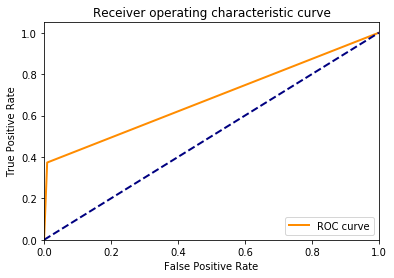

In [57]:
# ROC curve
roc_auc=roc_auc_score(y_train,LRout)
fpr,tpr,_=roc_curve(y_train,LRout)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

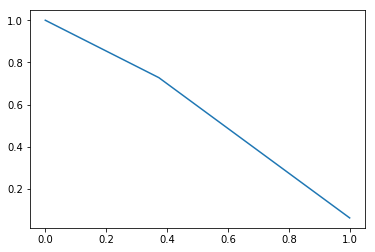

In [58]:
# Precision recall curve:
pr,rec,_=precision_recall_curve(y_train, probas_pred=LRout)
plt.plot(rec,pr)
plt.show()

In [59]:
#Confusion matrix:
cmtrain=pd.DataFrame(confusion_matrix(y_train,LRout))
cmtrain

,0,1
0,185411,1730
1,7762,4620


In [60]:
#Test performance
LRoutt=LR.predict(X_test)
print(performance(LR,X_test,y_test,LRoutt))

          0         1         2          3        4         5
0  Accuracy   ROC-auc    PR-auc  Precision   Recall  F1-score
1  0.952948  0.684455  0.316099   0.734296  0.37795  0.499039


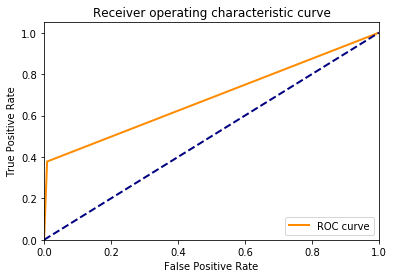

In [61]:
# ROC curve
roc_auc=roc_auc_score(y_test,LRoutt)
fpr,tpr,_=roc_curve(y_test,LRoutt)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

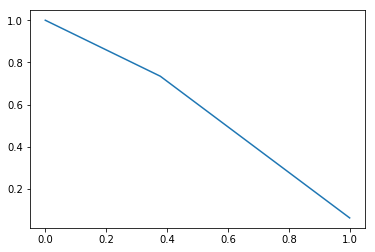

In [62]:
# Precision recall curve:
pr,rec,_=precision_recall_curve(y_test , probas_pred=LRoutt)
plt.plot(rec,pr)
plt.show()


In [63]:
#Confusion matrix:
cmtest=pd.DataFrame(confusion_matrix(y_test,LRoutt))
cmtest

,0,1
0,92730,846
1,3848,2338


As a first model, we have quite a good result. 
Clearly, we don't have the problem of overfiting since performance of the model on train and test are very close. 

I will use now SMOTE () Synthetic Minority Oversampling Technique), this  method use the KNN to create new observations, and I will use it on the same model ( logistic regression) because I have very imbalanced data 

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, Y_smote = smote.fit_sample(X_train, y_train )

In [26]:
LRsmote=logistic_regression_model.fit(X_smote, Y_smote)
#Train performance
LRoutsmote=LRsmote.predict(X_train)
print(performance(LRsmote,X_train,y_train,LRoutsmote))

          0         1         2          3         4         5
0  Accuracy   ROC-auc    PR-auc  Precision    Recall  F1-score
1  0.856798  0.866947  0.259388   0.286671  0.878533  0.432284


In [27]:
#Test performance
LRouttsmote=LRsmote.predict(X_test)
print(performance(LRsmote,X_test,y_test,LRouttsmote))

          0         1         2          3       4         5
0  Accuracy   ROC-auc    PR-auc  Precision  Recall  F1-score
1  0.856138  0.868587  0.259833   0.286096  0.8828  0.432144


SMOTE hasn't made performance better for the total model, but Roc auc and recall have improved.
Still we don't have overfitting problem

## Benchmarking to choose the best model


In [28]:
classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('MultinomialNB', MultinomialNB(alpha=0.001)), 
               ('SGDClassifier', SGDClassifier(loss='modified_huber', n_iter=5, random_state=0, shuffle=True)),
               ('GradientBoostingClassifier', GradientBoostingClassifier())
              ]

print('Multiple classifiers results: ')
for name, classifier in classifiers:
    for i in range(1):
        print (name)
        classifier.fit(X_train, y_train)
        end=time.time()
        #Train
        predtrain = classifier.predict(X_train)
        print(performancemodified(y_train,predtrain))
        #Test
        predtest = classifier.predict(X_test)
        print(performancemodified(y_test,predtest) )   

      
       

C:\Users\yesmi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Multiple classifiers results: 
RandomForestClassifierG
          0        1         2          3         4         5
0  Accuracy  ROC-auc    PR-auc  Precision    Recall  F1-score
1  0.994417  0.95577  0.915517   0.998231  0.911646  0.952976
          0         1         2          3         4         5
0  Accuracy   ROC-auc    PR-auc  Precision    Recall  F1-score
1  0.950993  0.663032  0.284793   0.728426  0.334303  0.458283
RandomForestClassifierE
          0         1         2          3         4         5
0  Accuracy   ROC-auc    PR-auc  Precision    Recall  F1-score
1  0.994427  0.956303  0.915612   0.997177  0.912777  0.953112
          0         1         2          3         4         5
0  Accuracy   ROC-auc    PR-auc  Precision    Recall  F1-score
1  0.950793  0.664963  0.284574    0.71919  0.338668   0.46049
AdaBoostClassifier
          0         1         2          3         4         5
0  Accuracy   ROC-auc    PR-auc  Precision    Recall  F1-score
1  0.952026  0.680745  

Most of the  algorithms have overfitting issue which can be cured with regularization.
Performances of the different models are close. 
The best models are Gradient boosting classifier and Decision Tree classifier.

So my second model is going to be Gradient Boosting classifier

### Second model: Gradient Boosting

In [33]:
Gradient_Boosting_model = GradientBoostingClassifier()
GB=Gradient_Boosting_model.fit(X_train, y_train)

In [34]:
#Train performance
GBout=GB.predict(X_train)
print(performance(GB,X_train,y_train,GBout))

          0         1        2          3         4         5
0  Accuracy   ROC-auc   PR-auc  Precision    Recall  F1-score
1  0.955359  0.703978  0.35042   0.753613  0.416976   0.53689


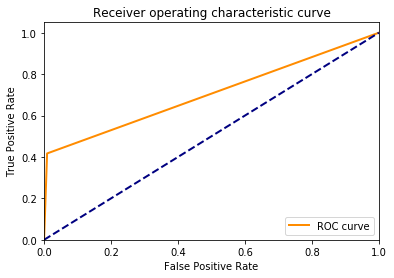

In [35]:
# ROC curve
roc_auc=roc_auc_score(y_train,GBout)
fpr,tpr,_=roc_curve(y_train,GBout)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

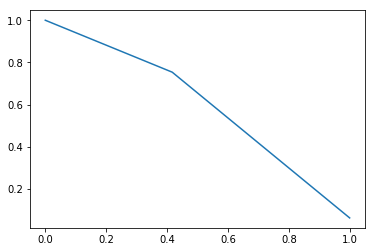

In [36]:
# Precision recall curve:
pr,rec,_=precision_recall_curve(y_train, probas_pred=GBout)
plt.plot(rec,pr)
plt.show()

In [38]:
#Confusion matrix:
cmtrain=pd.DataFrame(confusion_matrix(y_train,GBout))
cmtrain

,0,1
0,185453,1688
1,7219,5163


In [39]:
#Test performance
GBoutt=GB.predict(X_test)
print(performance(GB,X_test,y_test,GBoutt))

          0         1         2          3         4         5
0  Accuracy   ROC-auc    PR-auc  Precision    Recall  F1-score
1  0.955023  0.701865  0.345724   0.749193  0.412868  0.532361


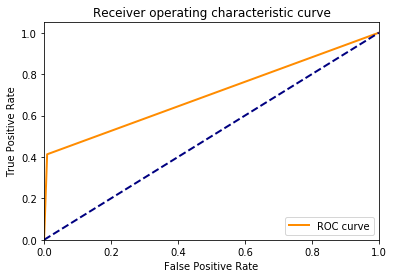

In [41]:
# ROC curve
roc_auc=roc_auc_score(y_test,GBoutt)
fpr,tpr,_=roc_curve(y_test,GBoutt)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

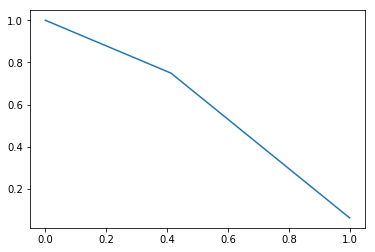

In [42]:
# Precision recall curve:
pr,rec,_=precision_recall_curve(y_test , probas_pred=GBoutt)
plt.plot(rec,pr)
plt.show()

In [44]:
#Confusion matrix:
cmtest=pd.DataFrame(confusion_matrix(y_test,GBoutt))
cmtest

,0,1
0,92721,855
1,3632,2554


# Conclusion

So far, performances of the models are quite good, but for future use , need to be better. 

I suggest:

- Dimensionality reduction with PCA, Kernel PCA, TSNE ...

- Adding penalty term to get over overfitting problem

- Using deep models maybe they will give us better results 

- Using Cost Sensitive Learning (CSL): he goal of this method is to choose a classifier with lowest total cost.
(Total Cost = Cost(FN)xFN + Cost(FP)xFP)( it focuses on precision and recall)

- Using other sampling techniques ( oversampling, undersampling, SMOTEboost, DataBoost... )

- Try other good classifiers like SVM, Xgboost , Factorization machine

- Or we can combine many classifiers using model stacking